## Stochastic Discount Factor

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

Ri=E(R̃ i−R̃ m)
Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

Vij=Cov[(R̃ i−R̃ m),(R̃ j−R̃ m)]
Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. The plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less). 

Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.

Part 2: Hansen–Jagannathan Bound

Suppose that consumption growth has a lognormal distribution with the possibility of rare disasters:

lng̃ =0.02+0.02ϵ̃ +ν̃ 
Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%). Simulate ε with (at least) 104 random draws from a standard normal distribution, and simulate ν with (at least) 104 random draws from a standard uniform distribution. 

Use the simulated distribution of consumption growth to calculate the pricing kernel for power utility:

M̃ =0.99g̃ −γ
for γ in the range [1,4], in increments of 0.1 (or less). Calculate the mean and standard deviation of the pricing kernel for each values of γ, and plot the ratio σm/μm (on the vertical axis) vs γ (on the horizontal axis). Take note of the smallest value of γ for which σm/μm > 0.4 (i.e., for which the Hansen–Jagannathan bound is satisfied). Briefly explain the economic significance of this result.

### Part 1: Minimum-Tracking-Error Frontier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_idt = pd.read_excel('Industry_Portfolios.xlsx', index_col=0, header=0)
data_mkt = pd.read_excel('Market_Portfolio.xlsx', index_col=0, header=0)
data_risk = pd.read_excel('Risk_Factors.xlsx', index_col=0, header=0)

Let the market return be the target return. Estimate the expected deviation from market return, for the ten industry portfolios:

In [3]:
data_mean = data_idt.sub(data_mkt ['Market'],axis = 0).mean()

Also estimate the covariance matrix of return deviations, for the ten industry portfolios:

In [5]:
data_cov = data_idt.sub(data_mkt ['Market'],axis = 0).cov()

In [7]:
data_std = data_idt.sub(data_mkt ['Market'],axis = 0).std()
data_std

NoDur    2.332316
Durbl    5.160320
Manuf    1.717702
Enrgy    4.390320
HiTec    2.258040
Telcm    2.163924
Shops    2.110125
Hlth     2.796506
Utils    3.502496
Other    2.122075
dtype: float64

In [8]:
mean_std = pd.DataFrame([data_mean,data_std],index=['mean','standard deviation'])
print(mean_std.shape)
mean_std

(2, 10)


,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
mean,0.154750,-0.01475,0.264750,0.483083,0.018167,0.133333,0.168250,0.035750,0.159083,-0.259000
standard deviation,2.332316,5.16032,1.717702,4.390320,2.258040,2.163924,2.110125,2.796506,3.502496,2.122075


In [9]:
ind_return=np.array(mean_std.loc['mean']) 

In [10]:
e_t=np.array([1]*10)
e=e_t.T

In [11]:
v=np.array(data_cov) 

In [12]:
v_inv=np.linalg.inv(v)

In [13]:
delta=(e_t)@v_inv@e  # here @ is used for matrix multiplication.
zeta=(ind_return.T)@v_inv@ind_return
alpha=(ind_return.T)@v_inv@e

In [14]:
rmv=alpha/delta
rmv

0.05007882397540081

In [15]:
Rp_1=np.linspace(0,rmv,100) #Lower Half Min-var Frontier
Sp_1=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_1-alpha/delta)**2)
Rp_2=np.linspace(rmv,0.1,100) #Upper Half Min-var Frontier
Sp_2=np.sqrt(1/delta+delta/(zeta*delta-alpha**2)*(Rp_2-alpha/delta)**2)

Plot the minimum-tracking-error frontier generated by the ten industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. The plot should cover the range from 0% to 0.1% on the vertical axis, in increments of 0.005% (or less). 

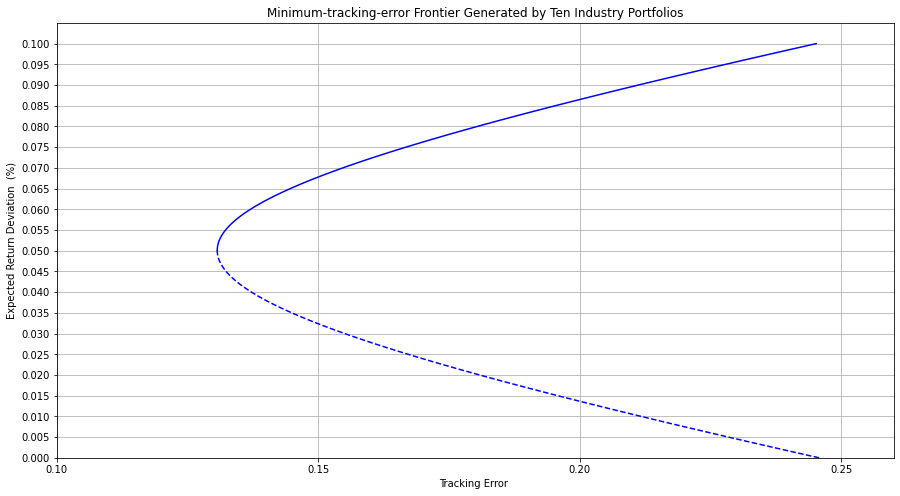

In [16]:
#Plot minimum-Variance Frontier without riskless assets

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-')
my_x_ticks = np.arange(0, 0.26, 0.05)
my_y_ticks = np.arange(0, 0.105, 0.005)
plt.yticks(my_y_ticks)
plt.xticks(my_x_ticks)
plt.xlim((0.1, 0.26))
plt.ylim((0, 0.105))

plt.title('Minimum-tracking-error Frontier Generated by Ten Industry Portfolios')
plt.xlabel('Tracking Error ')
plt.ylabel('Expected Return Deviation  (%)')
plt.grid()
plt.show()

Also plot the line starting from the origin that is tangent to the upper half of the minimum-tracking-error frontier, and calculate the information ratio and portfolio weights for the "tangency" portfolio.

In [17]:
#Minimum-Variance Frontier with riskless assets
Rf=0
Rp_f=np.linspace(Rf,0.1,100)
Sp_f=(Rp_f-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)**0.5
Sp_f

array([0.        , 0.00223233, 0.00446466, 0.00669699, 0.00892932,
       0.01116164, 0.01339397, 0.0156263 , 0.01785863, 0.02009096,
       0.02232329, 0.02455562, 0.02678795, 0.02902028, 0.0312526 ,
       0.03348493, 0.03571726, 0.03794959, 0.04018192, 0.04241425,
       0.04464658, 0.04687891, 0.04911124, 0.05134356, 0.05357589,
       0.05580822, 0.05804055, 0.06027288, 0.06250521, 0.06473754,
       0.06696987, 0.0692022 , 0.07143452, 0.07366685, 0.07589918,
       0.07813151, 0.08036384, 0.08259617, 0.0848285 , 0.08706083,
       0.08929316, 0.09152548, 0.09375781, 0.09599014, 0.09822247,
       0.1004548 , 0.10268713, 0.10491946, 0.10715179, 0.10938412,
       0.11161644, 0.11384877, 0.1160811 , 0.11831343, 0.12054576,
       0.12277809, 0.12501042, 0.12724275, 0.12947508, 0.1317074 ,
       0.13393973, 0.13617206, 0.13840439, 0.14063672, 0.14286905,
       0.14510138, 0.14733371, 0.14956604, 0.15179836, 0.15403069,
       0.15626302, 0.15849535, 0.16072768, 0.16296001, 0.16519

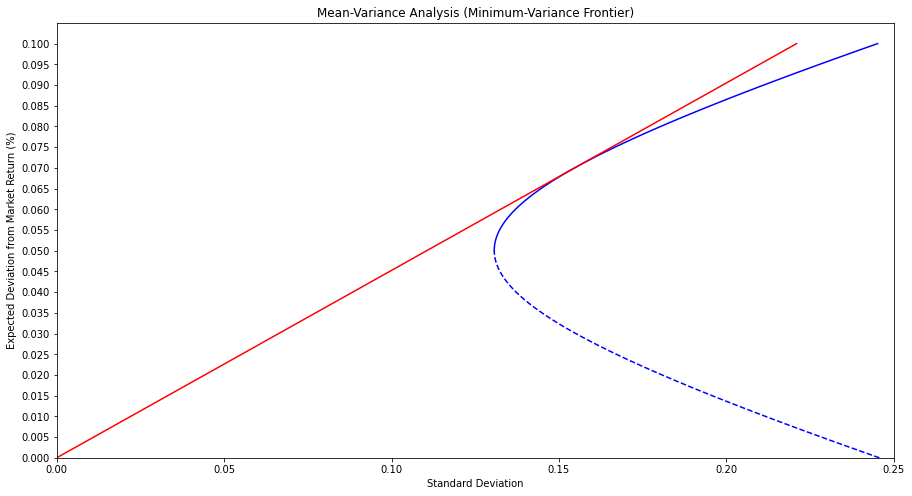

In [18]:
#plot

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-',label = 'The Frontier without Riskless Assets')
plt.plot(Sp_f,Rp_f,'r-',label='The Frontier with Riskless Assets')
my_y_ticks = np.arange(0, 0.105, 0.005)
plt.yticks(my_y_ticks)
plt.ylim(0,0.105)
plt.xlim(0,0.25)
plt.title('Mean-Variance Analysis (Minimum-Variance Frontier)')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Deviation from Market Return (%)')

plt.show()

In [19]:
#Tangency portfolio and weights
R_tg=(alpha*Rf-zeta)/(delta*Rf-alpha)
R_tg

0.06982811859065596

In [20]:
Sp_tg=-((zeta-2*alpha*Rf+delta*(Rf**2))**0.5)/(delta*(Rf-rmv)) #pg 23 formula
Sp_tg

0.15432053366443643

In [21]:
# Sharpe Ratio for Tangency portfolio
Sharpe_Ratio=(R_tg-Rf)/Sp_tg
Sharpe_Ratio
print("When target return is risk-free rate, information ratio is the same as Sharpe ratio.")
print('The information ratio is {}.'.format(Sharpe_Ratibo))

When target return is risk-free rate, information ratio is the same as Sharpe ratio.
The information ratio is 0.4524875396199335.


In [22]:
# weights of Tangency portfolio
lambda_tg=(R_tg-Rf)/(zeta-2*alpha*Rf+delta*Rf**2)
weights=[lambda_tg*v_inv@(ind_return-Rf*e)]
print(weights)

[array([5.26341943e-02, 1.53428449e-04, 1.37626709e-01, 8.70322403e-02,
       1.79352886e-01, 7.10739711e-02, 1.06884468e-01, 1.02775950e-01,
       4.01622131e-02, 2.22303939e-01])]


In [23]:
w=pd.DataFrame(weights,columns=data_cov.index,index=['Weight'])
w

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Weight,0.052634,0.000153,0.137627,0.087032,0.179353,0.071074,0.106884,0.102776,0.040162,0.222304


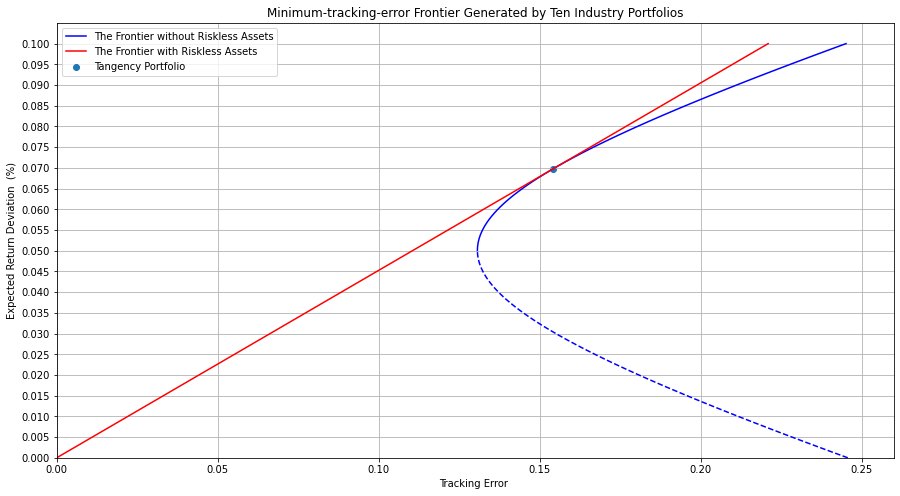

In [24]:
#plot

fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Sp_1,Rp_1,'b--')
plt.plot(Sp_2,Rp_2,'b-',label = 'The Frontier without Riskless Assets')
plt.plot(Sp_f,Rp_f,'r-',label='The Frontier with Riskless Assets')
plt.scatter(Sp_tg,R_tg,label='Tangency Portfolio')
my_x_ticks = np.arange(0, 0.26, 0.05)
my_y_ticks = np.arange(0, 0.105, 0.005)
plt.yticks(my_y_ticks)
plt.xticks(my_x_ticks)
plt.xlim((0, 0.26))
plt.ylim((0, 0.105))
plt.legend()
plt.title('Minimum-tracking-error Frontier Generated by Ten Industry Portfolios')
plt.xlabel('Tracking Error ')
plt.ylabel('Expected Return Deviation  (%)')
plt.grid()
plt.show()

In [25]:
#information ratio for 10 industries
info_ratio = data_mean /data_std
info_ratio

NoDur    0.066350
Durbl   -0.002858
Manuf    0.154130
Enrgy    0.110034
HiTec    0.008045
Telcm    0.061616
Shops    0.079735
Hlth     0.012784
Utils    0.045420
Other   -0.122050
dtype: float64

In [26]:
data_cov

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,5.439696,-6.073035,-1.396192,-1.200533,-1.883151,1.538885,1.140741,3.815137,4.272002,-1.768738
Durbl,-6.073035,26.628901,4.908024,-3.481055,1.891577,-1.707625,-0.354335,-8.082946,-9.617490,4.385865
Manuf,-1.396192,4.908024,2.950499,1.666133,0.065267,-0.626416,-1.154597,-2.288900,-1.901412,0.358904
Enrgy,-1.200533,-3.481055,1.666133,19.274911,-1.516972,-1.040525,-3.710439,-2.485796,4.454368,-3.864826
HiTec,-1.883151,1.891577,0.065267,-1.516972,5.098746,-0.773294,-0.245350,-1.936284,-2.342839,-1.404050
Telcm,1.538885,-1.707625,-0.626416,-1.040525,-0.773294,4.682567,0.463797,0.693157,2.721477,-1.271778
Shops,1.140741,-0.354335,-1.154597,-3.710439,-0.245350,0.463797,4.452628,0.764510,-0.176666,-0.256987
Hlth,3.815137,-8.082946,-2.288900,-2.485796,-1.936284,0.693157,0.764510,7.820446,3.496136,-1.726842
Utils,4.272002,-9.617490,-1.901412,4.454368,-2.342839,2.721477,-0.176666,3.496136,12.267476,-4.055112
Other,-1.768738,4.385865,0.358904,-3.864826,-1.404050,-1.271778,-0.256987,-1.726842,-4.055112,4.503204


## Part 2 HANSEN-JAGANNATHAN BOUND

ln(g) = miu + sigma*z +v , where by z ~ N(0,1)

miu is the mean of the consumption growth
sigma is the std of consumption growth rate
v is the diasster influence factor

lng̃ =0.02+0.02ϵ̃ +ν̃ 

Here ε is a standard normal random variable, while ν is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%). Simulate ε with (at least) 104 random draws from a standard normal distribution, and simulate ν with (at least) 104 random draws from a standard uniform distribution. 

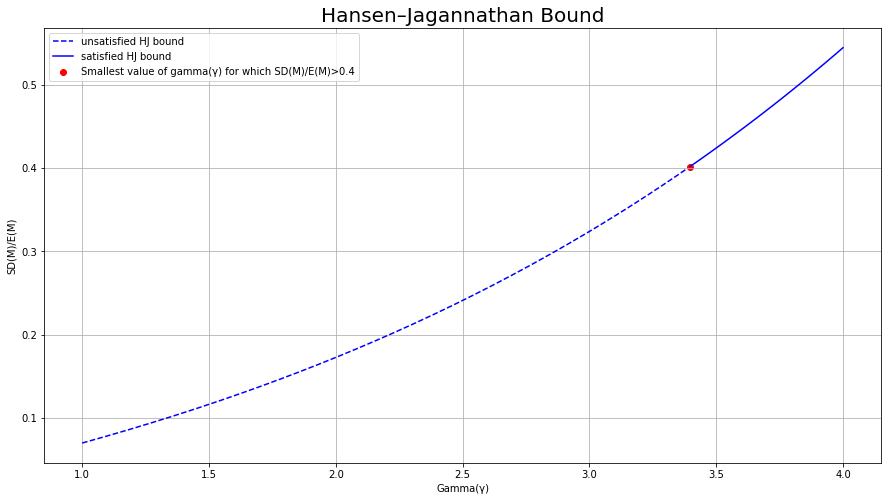

Text(0.5, 1.0, 'Satisfied Hansen-Jagannathon Bound')

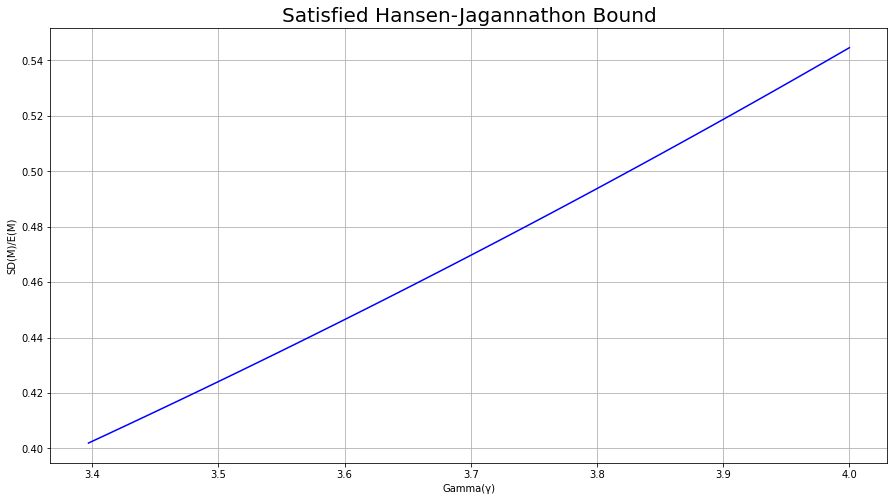

In [27]:
num_c = 10000
consumption_growth = np.zeros(num_c)
for i in range(num_c):
    mu, sigma = 0,1
    epsilon = np.random.standard_normal()
    prob_nu = np.random.uniform(0,1)
    if prob_nu <0.017:
        nu = np.log(0.65)
    else:
        nu = 0
    consumption_growth[i] = np.exp(0.02 + 0.02*epsilon + nu)

'''---Part 1:Hansen-Jagannathon Bound---'''
num_g = 200
delta = 0.99
gamma1 = np.linspace(1,4,num_g)
HJ_bound = np.zeros(num_g)
for i in range(num_g):
    HJ_bound[i] = np.std(delta*consumption_growth**(-gamma1[i]))/np.mean(delta*consumption_growth**(-gamma1[i]))
SM_idx = np.min(np.argwhere(HJ_bound>0.4))
SM_value = HJ_bound[np.min(np.argwhere(HJ_bound >0.4))]
gamma1_ns, HJ_bound_ns = gamma1[:SM_idx], HJ_bound[:SM_idx]
gamma1_s, HJ_bound_s = gamma1[SM_idx:], HJ_bound[SM_idx:]

fig,ax1 = plt.subplots(figsize=(15,8))
ax1.plot(gamma1_ns,HJ_bound_ns,c='b',ls='--',label='unsatisfied HJ bound')
ax1.plot(gamma1_s,HJ_bound_s, c='b',label='satisfied HJ bound')
plt.scatter(gamma1[SM_idx],SM_value,c='r',label='Smallest value of gamma(γ) for which SD(M)/E(M)>0.4')
plt.xlabel('Gamma(γ)')
plt.ylabel('SD(M)/E(M)')
plt.title('Hansen–Jagannathan Bound',fontsize=20)
plt.legend(loc='upper left')
plt.grid()
plt.show()


fig,ax = plt.subplots(figsize=(15,8))
ax.plot(gamma1_s,HJ_bound_s,c='b')
plt.grid()
plt.xlabel('Gamma(γ)')
plt.ylabel('SD(M)/E(M)')
plt.title('Satisfied Hansen-Jagannathon Bound',fontsize=20)

Method 2

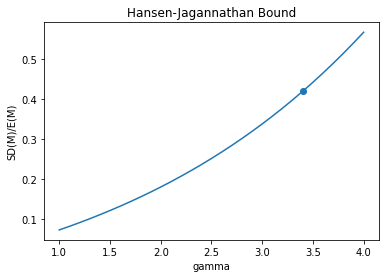

In [28]:
#simulate epsilon & nu
np.random.seed(1)
ep=np.random.normal(0,1,1000)
nu=np.array([np.log(0.65) if x<0.017 else 0 for x in np.random.uniform(0,1,1000)])
g=np.exp(0.02+0.02*ep+nu)
# PART 1: HANSEN-JAGANNATHAN BOUND
# calculate SD/E
M=[]  #Discount factor, M = Delta*[g^(-gamma)]; Delta is discount factor given = 0.99
for gamma in np.linspace(1,4,31): # generate 100 gamma within [1,4]
    z=np.std([0.99*a**(-gamma) for a in g])/np.mean([0.99*a**(-gamma) for a in g])
    M.append(z)

#find the smallest gamma
f=zip(list(np.linspace(1,4,31)),M)
min_gamma=min([q[0] for q in f if q[1]>0.4])  #attn sequence of for and if

#plot
plt.plot(np.linspace(1,4,31),M)
plt.scatter(min_gamma,np.std([0.99*t**-min_gamma for t in g])/np.mean([0.99*t**-min_gamma for t in g]))
plt.title('Hansen-Jagannathan Bound')
plt.xlabel('gamma')
plt.ylabel('SD(M)/E(M)')
plt.show()

Economic Significance:

H-J bound sets lower bound on volatility (ratio) of pricing kernel to highest Sharpe ratio of all risky portfolios.

When investor has constant relative risk aversion, H–J bound sets lower bound on γ, which is investor's coefficient of relative risk aversion.

H–J bound is satisfied for γ ≈ 3.3 when distribution of consumption growth includes effect of rare disasters, so no equity premium puzzle.